# Random Forests

To illustrate how easy it is to try out different estimators in scikit-learn, and also draw attention to the fact that estimators based on linear regression represent only a small part of the total space, let's repeat some of our earlier regression analyses using a very different estimator: the `RandomForestRegressor`. Random forests are essentially collections (or *ensembles*) of decision trees. A decision tree is a structure for generating classification (classification trees) or regression (regression trees) predictions. Here's an example of what a regression tree might look like, if used in our personality data to try and predict age:

![decision tree example](images/decision_tree.png)

At each node, we evaluate a particular conditional (e.g., is the observed value of Excitement-Seeking less than 3.15?) and follow the appropriate branch. We repeat the process until we reach a terminal node, whereupon the tree produces the predicted value for that observation.

Random forests extend this principle by *bagging* multiple decision trees and aggregating their outputs. Decision trees are very flexible, and have a propensity to overfit. By averaging over a lot of different trees (each one generated by, e.g., resampling the data), we hopefully stabilize our predictions and reduce overfitting. Random forests are popular because they're extremely powerful, their constituent trees are highly interpretable, and they tend to perform well when we have a lot of data. The downsides are that, being very flexible, they have a tendency to overfit, and careful tuning is often required to achieve good performance. They can also be quite slow to fit, as performance tends to improve with the number of constituent decision trees.
<div style="margin-top: 20px;">


</div>

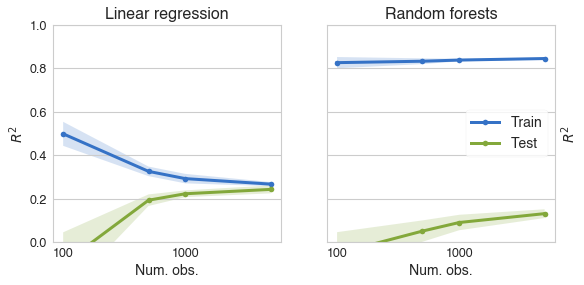

In [10]:
from sklearn.ensemble import RandomForestRegressor

facets, age = get_features(data, 'facets', 'AGE')

# ideally we'd want to use a much higher number of trees (e.g.,
# 500 - 1000), but this will be very slow, so we stick with
# a small number for demonstration purposes.
estimators = [LinearRegression(), RandomForestRegressor(10)]
labels = ["Linear regression", "Random forests"]

# for the sake of speed, we'll limit ourselves to n = 5,000
plot_learning_curves(estimators, [facets, facets], age, [100, 500, 1000, 5000], labels)

Unlike regression-based methods, random forests (and decision trees) don't have linear coefficients. Instead, we can obtain *feature importances*, which tell us how important each feature is to the overall prediction (more important features are better at reducing uncertainty, and occur closer to the root of the tree).

In [11]:
rf = RandomForestRegressor(500)
X, y = get_features(data, 'facets', 'AGE', n=1000)
rf.fit(X, y)
pd.Series(rf.feature_importances_, index=X.columns).sort_values()

Morality                0.020686
Altruism                0.022067
Dutifulness             0.022325
Emotionality            0.022612
Cautiousness            0.022938
Modesty                 0.022994
Trust                   0.023396
Depression              0.023674
Anxiety                 0.023720
Cooperation             0.024037
Intellect               0.024420
Anger                   0.024793
Cheerfulness            0.025377
Sympathy                0.025907
Friendliness            0.026666
Activity Level          0.027103
Orderliness             0.027631
Self-Efficacy           0.028298
Gregariousness          0.029848
Imagination             0.031705
Artistic Interests      0.032199
Assertiveness           0.032278
Self-Discipline         0.032950
Immoderation            0.034421
Self-Consciousness      0.037898
Liberalism              0.039709
Adventurousness         0.041347
Achievement-Striving    0.041809
Vulnerability           0.045743
Excitement-Seeking      0.161447
dtype: flo

We can also plot the individual decision trees. Note that different trees can have strikingly different structures despite performing equally well predictively—an observation that should lead us to exercise caution when interpreting decision trees, even if they *seem* straightforward.

In [12]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image, display

def plot_graphviz_tree(tree):
    export_graphviz(tree, out_file='tree.dot', max_depth=3, filled=True,
                    feature_names=X.columns, impurity=False, rounded=True,
                    proportion=False, precision=2);

    call(['dot', '-Tpng', 'tree.dot', '-o', 'images/tree.png', '-Gdpi=600'])
    display(Image(filename = 'images/tree.png'));

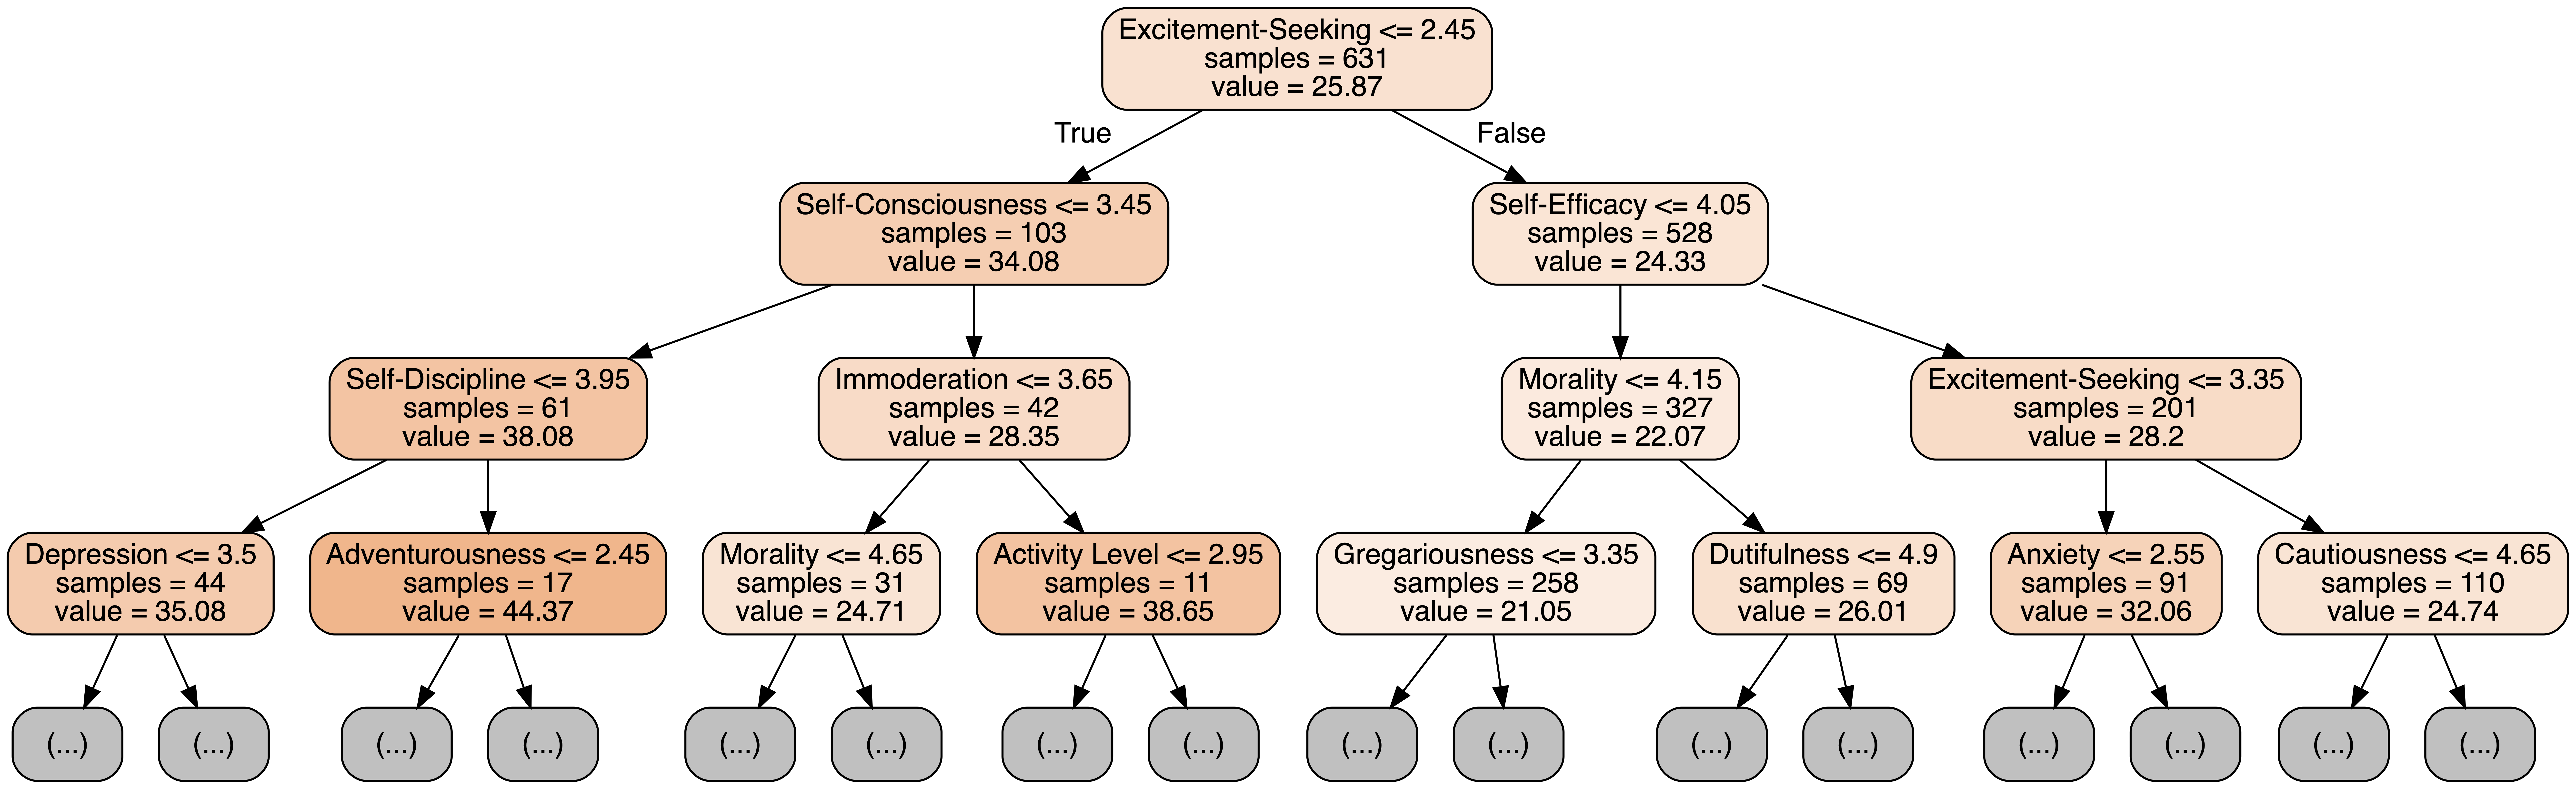

In [13]:
plot_graphviz_tree(rf.estimators_[0]);

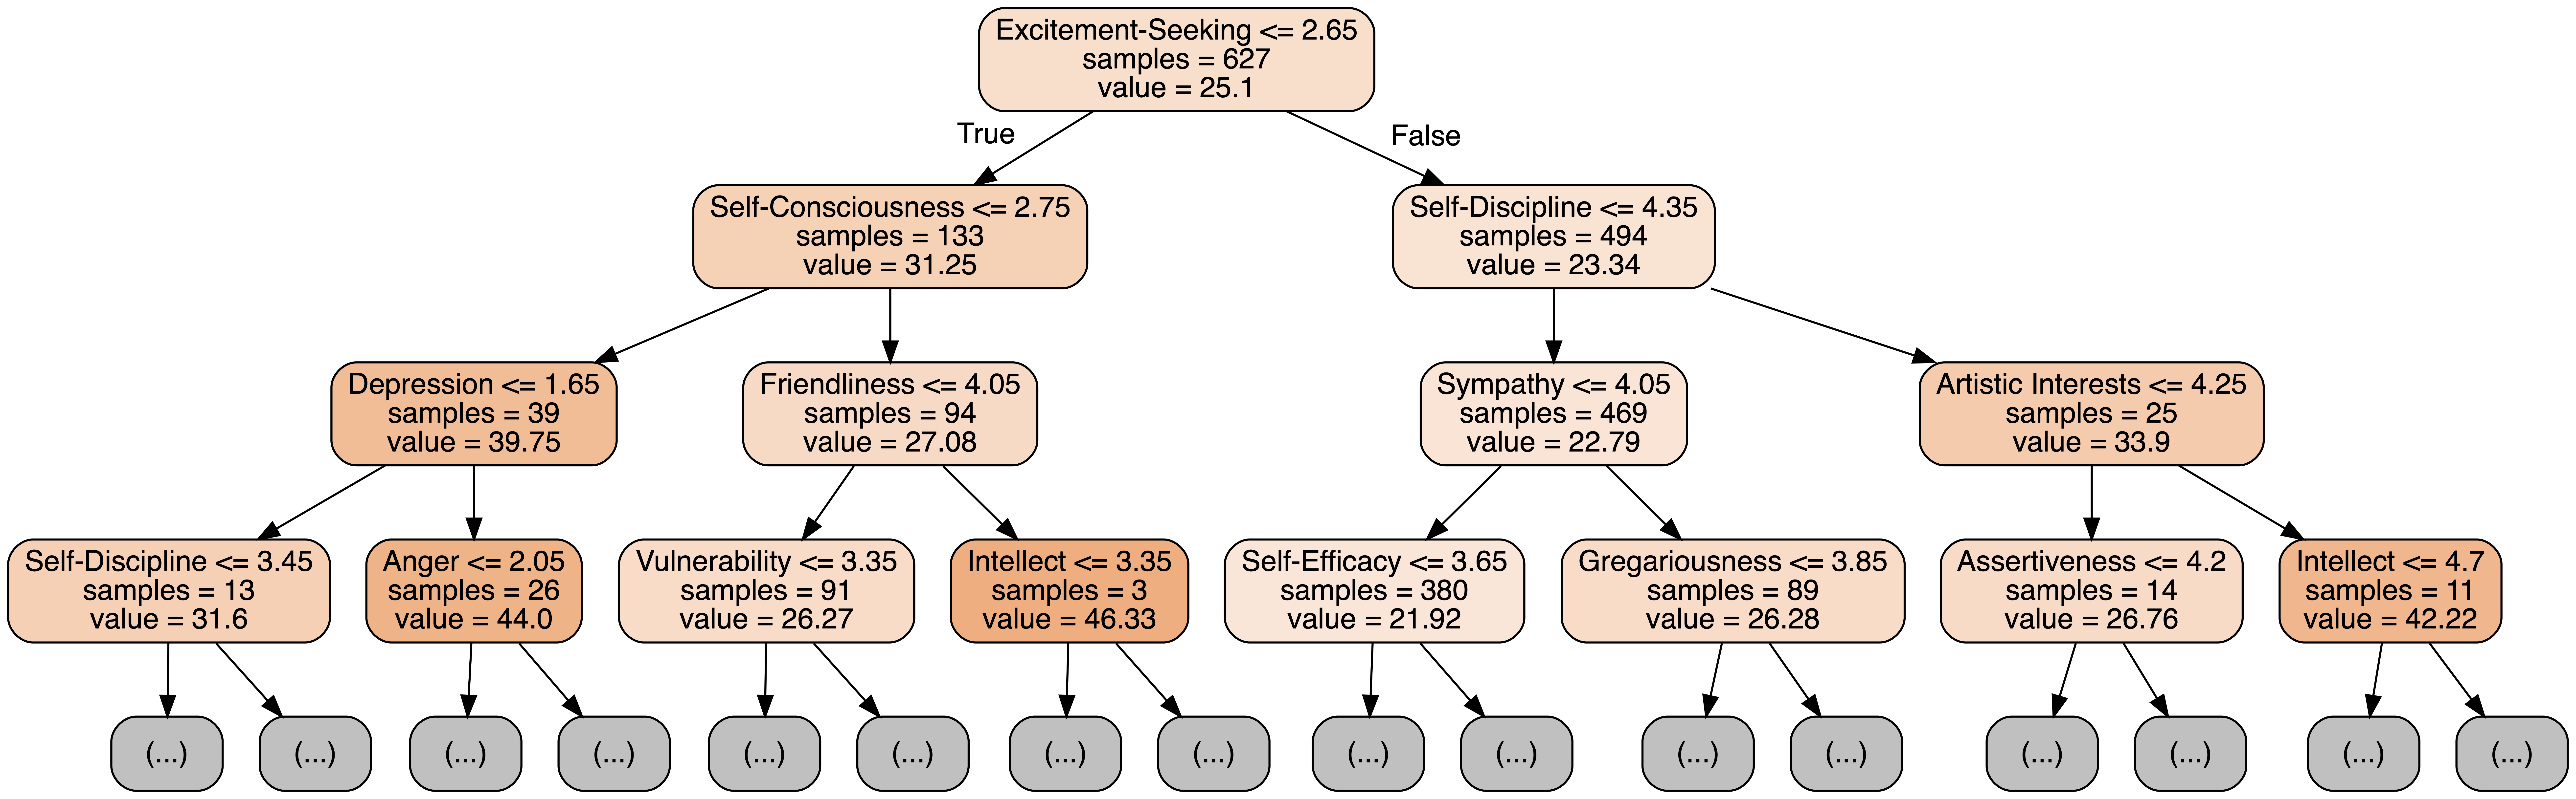

In [14]:
plot_graphviz_tree(rf.estimators_[1]);